StudentID 6610545502:<br>
Firstname Riccardo M. :<br>
Lastname Bonato:<br>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import ast
%matplotlib inline

In [6]:
df = pd.read_csv("game_stats.csv")
for col in ['units_deployed', 'damage_to_units', 'damage_to_towers', 'resources_used']:
    df[col] = df[col].apply(ast.literal_eval)

level1_df = df[df['level'] == 1].copy()
print("Level 1 Data Loaded:")
level1_df.head()

Level 1 Data Loaded:


,timestamp,level,outcome,duration,units_deployed,damage_to_units,damage_to_towers,resources_used
0,2025-05-10T11:59:40.719196,1,win,78.72,"{'Pantheon': 10, 'LumberJack': 14}","{'Pantheon': 1465.3, 'LumberJack': 776.99}","{'Pantheon': 25, 'LumberJack': 40}","{'solar': 28, 'lunar': 40, 'eclipse': 10}"
1,2025-05-10T12:02:39.351562,1,win,73.72,"{'Pantheon': 6, 'LumberJack': 13, 'KarasuTengu...","{'Pantheon': 666.18, 'LumberJack': 835.62, 'Ka...","{'Pantheon': 22, 'LumberJack': 24, 'KarasuTeng...","{'solar': 78, 'lunar': 50, 'eclipse': 6}"
2,2025-05-10T12:05:18.178855,1,win,51.14,"{'LumberJack': 15, 'BrownBeard': 11, 'Pantheon...","{'LumberJack': 1119.01, 'BrownBeard': 2567.67,...","{'LumberJack': 32, 'BrownBeard': 19, 'Pantheon...","{'solar': 74, 'lunar': 62, 'eclipse': 12}"
3,2025-05-10T12:08:34.575156,1,win,61.60,"{'LumberJack': 12, 'BrownBeard': 13}","{'LumberJack': 662.81, 'BrownBeard': 3863.93}","{'LumberJack': 40, 'BrownBeard': 34}","{'solar': 76, 'lunar': 0, 'eclipse': 0}"
4,2025-05-10T12:04:23.270917,1,win,71.96,"{'BrownBeard': 15, 'Pantheon': 11, 'KarasuTeng...","{'BrownBeard': 4390.54, 'Pantheon': 1551.96, '...","{'BrownBeard': 30, 'Pantheon': 50, 'KarasuTeng...","{'solar': 76, 'lunar': 62, 'eclipse': 11}"


In [23]:
summary = level1_df[['duration']].describe()
summary['total_damage'] = damage_df.sum(axis=1).describe()
print(summary)

       duration  total_damage
count  50.00000     50.000000
mean   52.21820  10922.584800
std    19.71084   4416.203237
min    20.71000   2240.490000
25%    37.08250   7083.052500
50%    52.15000  11005.980000
75%    65.94500  14116.102500
max    87.56000  21505.170000


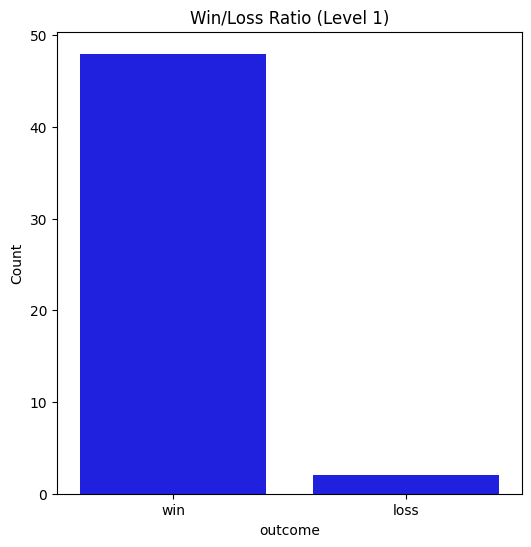

In [19]:
win_counts = level1_df['outcome'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=win_counts.index, y=win_counts.values, color="blue")
plt.title("Win/Loss Ratio (Level 1)")
plt.ylabel("Count")
plt.show()

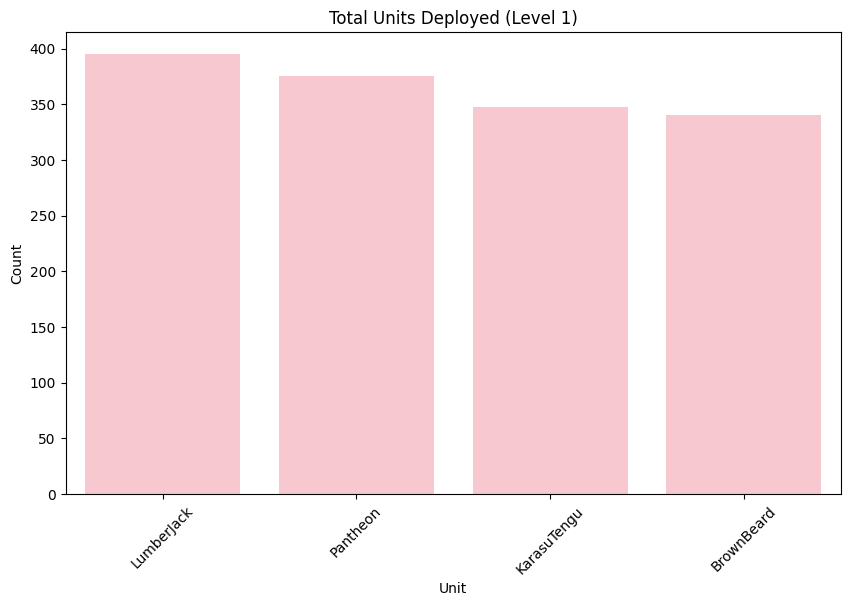

In [9]:
unit_counts = pd.DataFrame(level1_df['units_deployed'].tolist()).sum()
unit_counts.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x=unit_counts.index, y=unit_counts.values, color='pink')
plt.title("Total Units Deployed (Level 1)")
plt.ylabel("Count")
plt.xlabel("Unit")
plt.xticks(rotation=45)
plt.show()

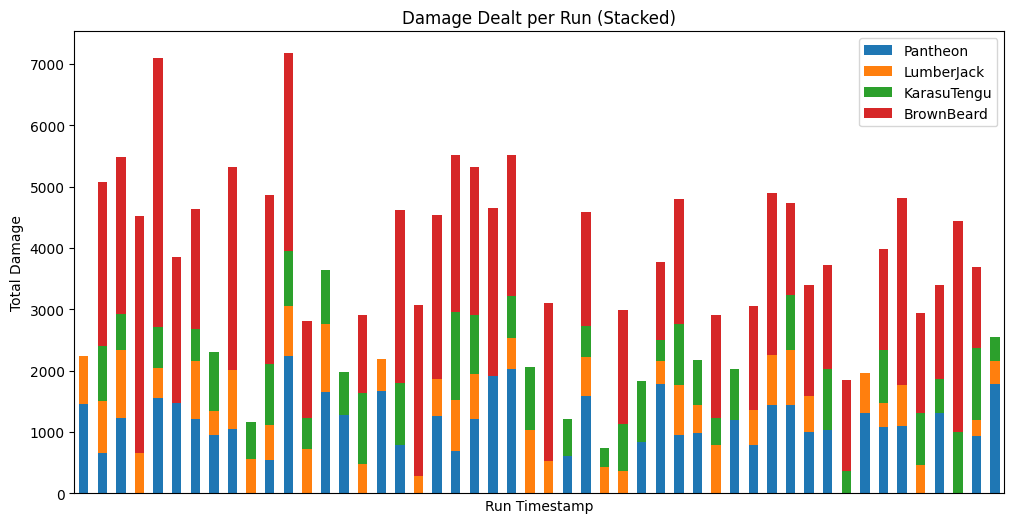

In [10]:
# Damage to Units
damage_df = pd.DataFrame(level1_df['damage_to_units'].tolist())
damage_df.index = level1_df['timestamp']

damage_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Damage Dealt per Run (Stacked)")
plt.ylabel("Total Damage")
plt.xlabel("Run Timestamp")
plt.xticks([])
plt.legend(loc='upper right')
plt.show()

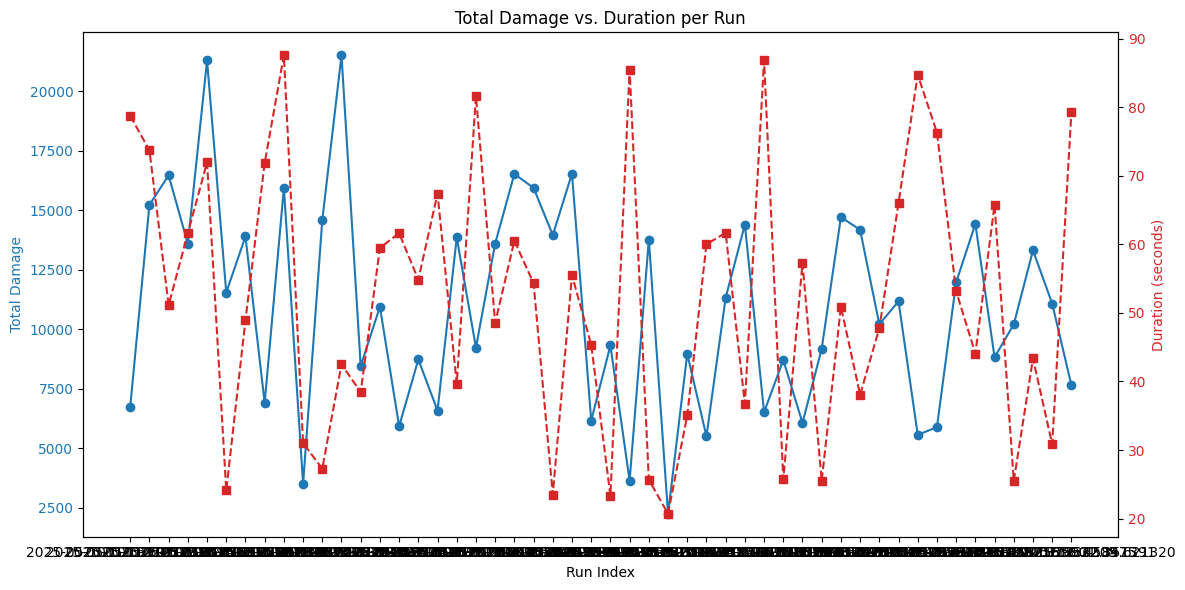

In [14]:
total_damage = damage_df.sum(axis=1)

durations = level1_df['duration']

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Run Index')
ax1.set_ylabel('Total Damage', color=color)
ax1.plot(total_damage.index, total_damage.values, color=color, marker='o', label='Total Damage')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Duration (seconds)', color=color)
ax2.plot(total_damage.index, durations.values, color=color, marker='s', linestyle='--', label='Duration')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Damage vs. Duration per Run')
fig.tight_layout()
plt.show()

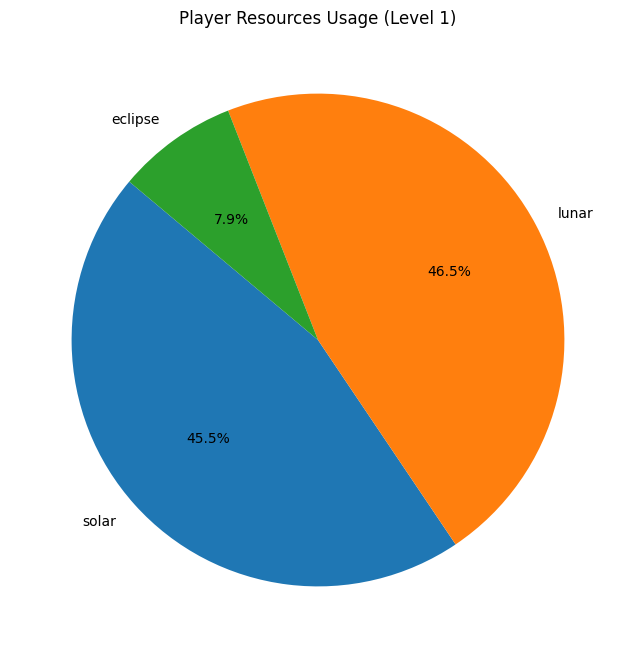

In [15]:
resource_sums = pd.DataFrame(level1_df['resources_used'].tolist()).sum()

plt.figure(figsize=(8,8))
plt.pie(resource_sums, labels=resource_sums.index, autopct='%1.1f%%', startangle=140)
plt.title("Player Resources Usage (Level 1)")
plt.show()

In [31]:
loss_df = level1_df[level1_df['outcome'] == 'loss']
loss_counts = Counter()
for d in loss_df['units_deployed']:
    loss_counts.update(d.keys())

print("Characters used most in losses:")
for char, count in loss_counts.most_common():
    print(f"{char}: {count}")

Characters used most in losses:
LumberJack: 2
KarasuTengu: 2
Pantheon: 2
BrownBeard: 2


In [27]:
total_counts = Counter()
for d in level1_df['units_deployed']:
    total_counts.update(d.keys())

top3 = total_counts.most_common(3)
print("most-used characters:")
for char, count in top3:
    print(f"{char}: {count} deployments")

most-used characters:
LumberJack: 39 deployments
Pantheon: 37 deployments
KarasuTengu: 36 deployments


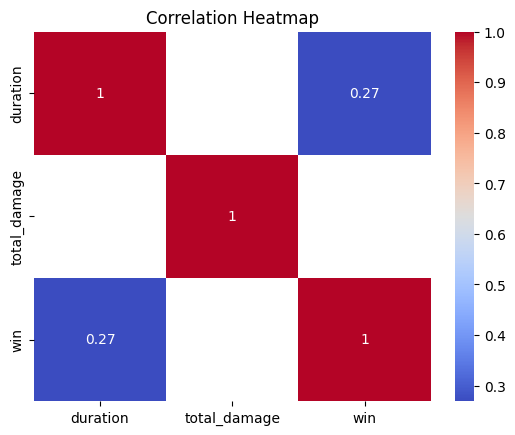

In [24]:
import seaborn as sns

corr_df = pd.DataFrame({
    'duration': level1_df['duration'],
    'total_damage': damage_df.sum(axis=1),
    'win': level1_df['outcome'].apply(lambda x: 1 if x == 'win' else 0)
})
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
from collections import Counter

# Separate win and all battles
win_df = level1_df[level1_df['outcome'] == 'win']
all_df = level1_df

# Count character appearances in wins
win_counts = Counter()
for d in win_df['units_deployed']:
    win_counts.update(d.keys())

# Count character appearances in all runs
total_counts = Counter()
for d in all_df['units_deployed']:
    total_counts.update(d.keys())

# Calculate winrate per character
winrates = {}
for char in total_counts:
    wins = win_counts[char]
    total = total_counts[char]
    winrate = wins / total if total > 0 else 0
    winrates[char] = winrate

# Find character with highest winrate
top_char = max(winrates, key=winrates.get)
top_rate = winrates[top_char]

# Display result
print(f" Character with highest winrate: {top_char} → {top_rate:.2%}")
winrate_df = pd.DataFrame.from_dict(winrates, orient='index', columns=['Winrate']).sort_values(by='Winrate', ascending=False)
display(winrate_df)

 Character with highest winrate: LumberJack → 94.87%


,Winrate
LumberJack,0.948718
Pantheon,0.945946
KarasuTengu,0.944444
BrownBeard,0.944444
